# Planning Stage - Christin Wang #

In [24]:
library(MASS)
library(tidyverse)
library(repr)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(AER)
library(broom)
library(modelr)
library(gridExtra)

options(repr.plot.width = 15, repr.plot.height = 15) 

将程序包安装入'C:/Users/chris/AppData/Local/R/win-library/4.3'
(因为'lib'没有被指定)



程序包'gridExtra'打开成功，MD5和检查也通过

下载的二进制程序包在
	C:\Users\chris\AppData\Local\Temp\RtmpuU7IKZ\downloaded_packages里


Warning message:
"程辑包'gridExtra'是用R版本4.3.3 来建造的"

载入程辑包：'gridExtra'


The following object is masked from 'package:dplyr':

    combine




## I. Data Description ##

The Cleveland heart disease dataset, sourced from the UCI repository, was originally donated on 6/30/1988, contributed by A. Janosi, W. Steinbrunn, M. Pfisterer, R. Detrano, etc. It was collected from medical records for heart disease research. The primary use of this dataset is to distinguish between the presence (values 1, 2, 3, 4) and absence (value 0) of heart disease. For this project, we are going to use the Processed Cleveland data, containing 303 rows and 14 columns (extracted from a larger set of 76).


The dataset contains 13 attributes and a target variable, with 8 categorical variables and 5 numerical variables. The detailed description are as follows:
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. ca: number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. num: diagnosis of heart disease
    - Value 0: absence
    - Value 1,2,3,4: presence


## II. Question ##

1. [Inference] Amongst the 13 clinical covariates, which are associated with heart disease?
2. [Prediction] Are we able to use the associated covariates to predict the probability of the presence of heart disease in a patient?

- The dataset contains 13 variables that are potential predictors of heart disease. By splitting the data into train & test, picking the input variables that provide the best goodness of fit, we can build a logistic regression model to predict the probability of a patient having heart disease.


## III. Exploratory Data Analysis and Visualization ##

1. Data preperation

- Read the csv file of `processed.cleveland.data`.
- Rename the column names of the dataset.
- Change the diagnosis presence values 1,2,3,4 all into 1.
- Mutate all catagorical variables into factors for coding convinience.
- Drop any NA values.

In [22]:
heart_data <- read_csv("https://raw.githubusercontent.com/Speculatorrr/STAT301/main/processed.cleveland.data?token=GHSAT0AAAAAACVKAVDCISXAPJBRTBVAWBUQZVEDPNQ", 
                        col_names = FALSE)
colnames(heart_data) <- c("age", "sex", "cp", "trestbps", "chol",
                            "fbs", "restecg", "thalach", "exang", "oldpeak",
                            "slope", "ca", "thal", "num")

categorical_vars <- c("sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal")

heart_data <- heart_data %>%
    mutate(num = if_else(num > 0, 1, 0)) %>%
    mutate(across(all_of(categorical_vars), as.factor),
    num = as.factor(num)) %>%
    drop_na()

head(heart_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


2. Visualization

- Draw the binary results of the Heart Disease Diagnosis `num` into a histograph.

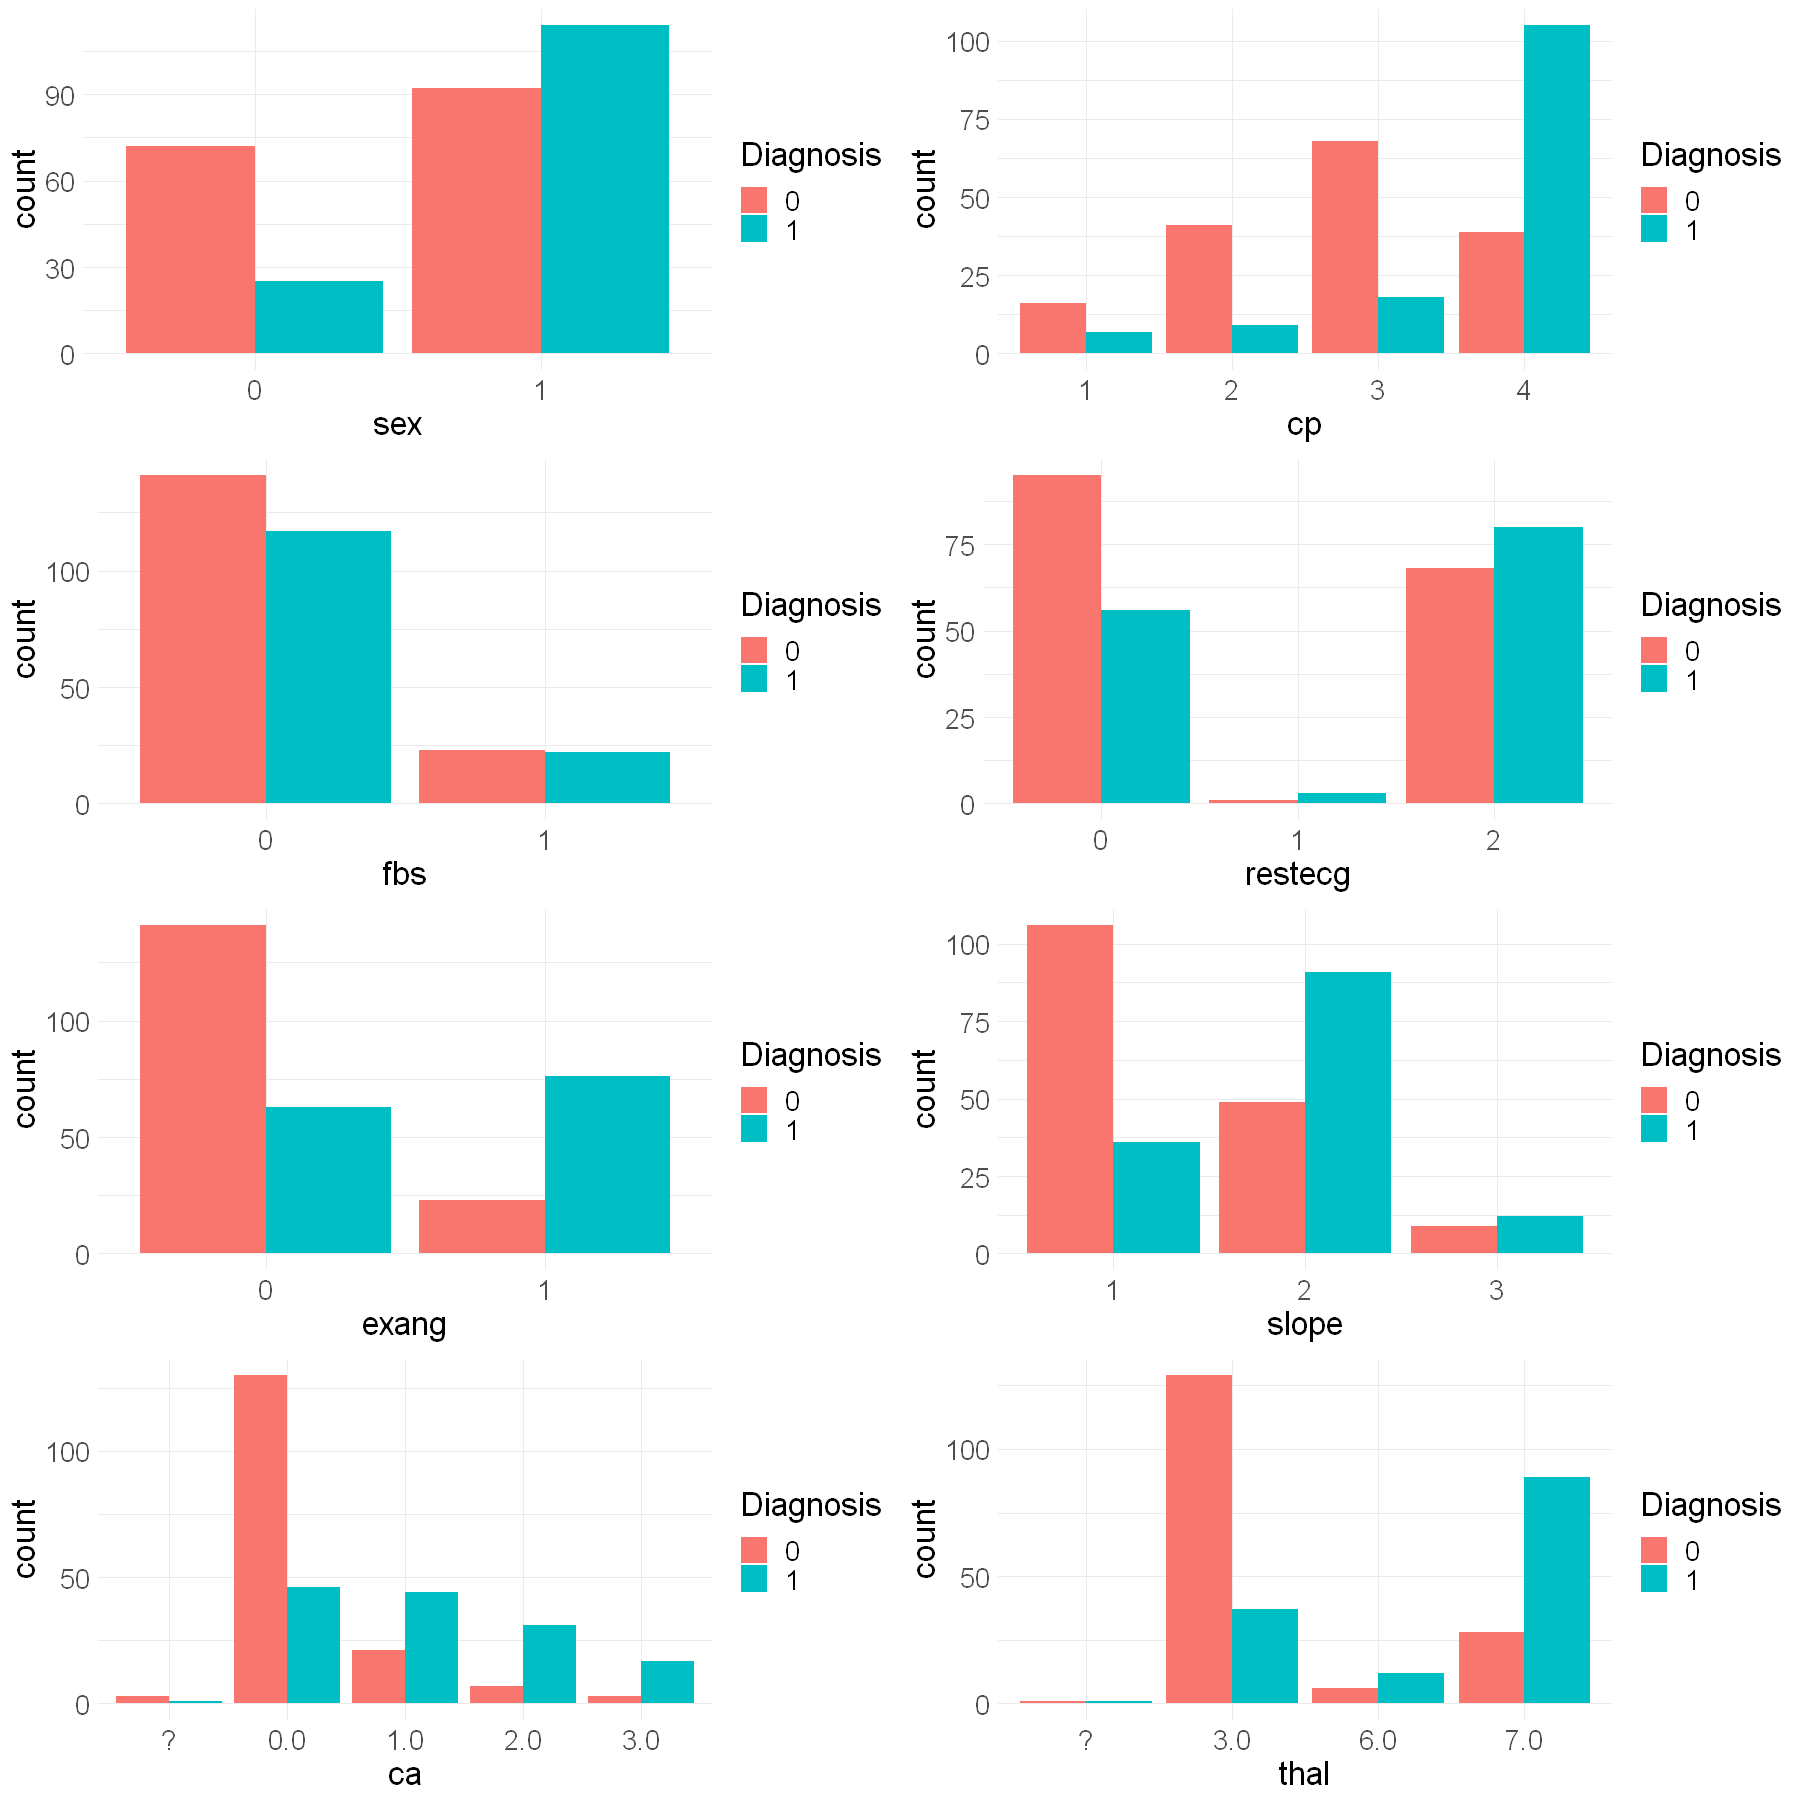

In [31]:
# Function to draw bar chart
draw_bar_chart <- function(data, categorical_var, num) {
  ggplot(data, aes_string(x = categorical_var, fill = num)) +
    geom_bar(position = "dodge") +
    theme_minimal() +
    theme(text = element_text(size = 20)) +
    labs(x = categorical_var, fill = "Diagnosis")
}

sex_bar <- draw_bar_chart(heart_data, "sex", "num")
cp_bar <- draw_bar_chart(heart_data, "cp", "num")
fbs_bar <- draw_bar_chart(heart_data, "fbs", "num")
restecg_bar <- draw_bar_chart(heart_data, "restecg", "num")
exang_bar <- draw_bar_chart(heart_data, "exang", "num")
slope_bar <- draw_bar_chart(heart_data, "slope", "num")
ca_bar <- draw_bar_chart(heart_data, "ca", "num")
thal_bar <- draw_bar_chart(heart_data, "thal", "num")

grid.arrange(
  sex_bar, cp_bar, fbs_bar, restecg_bar,
  exang_bar, slope_bar, ca_bar, thal_bar,
  ncol = 2
)

- Correlation matrix with all pairwise correlations between the numerical variables on a heatmap.

    - By identifying the corralation between different variables, this can help us detect multicollinarity, which can insure the correctness of our prediction.

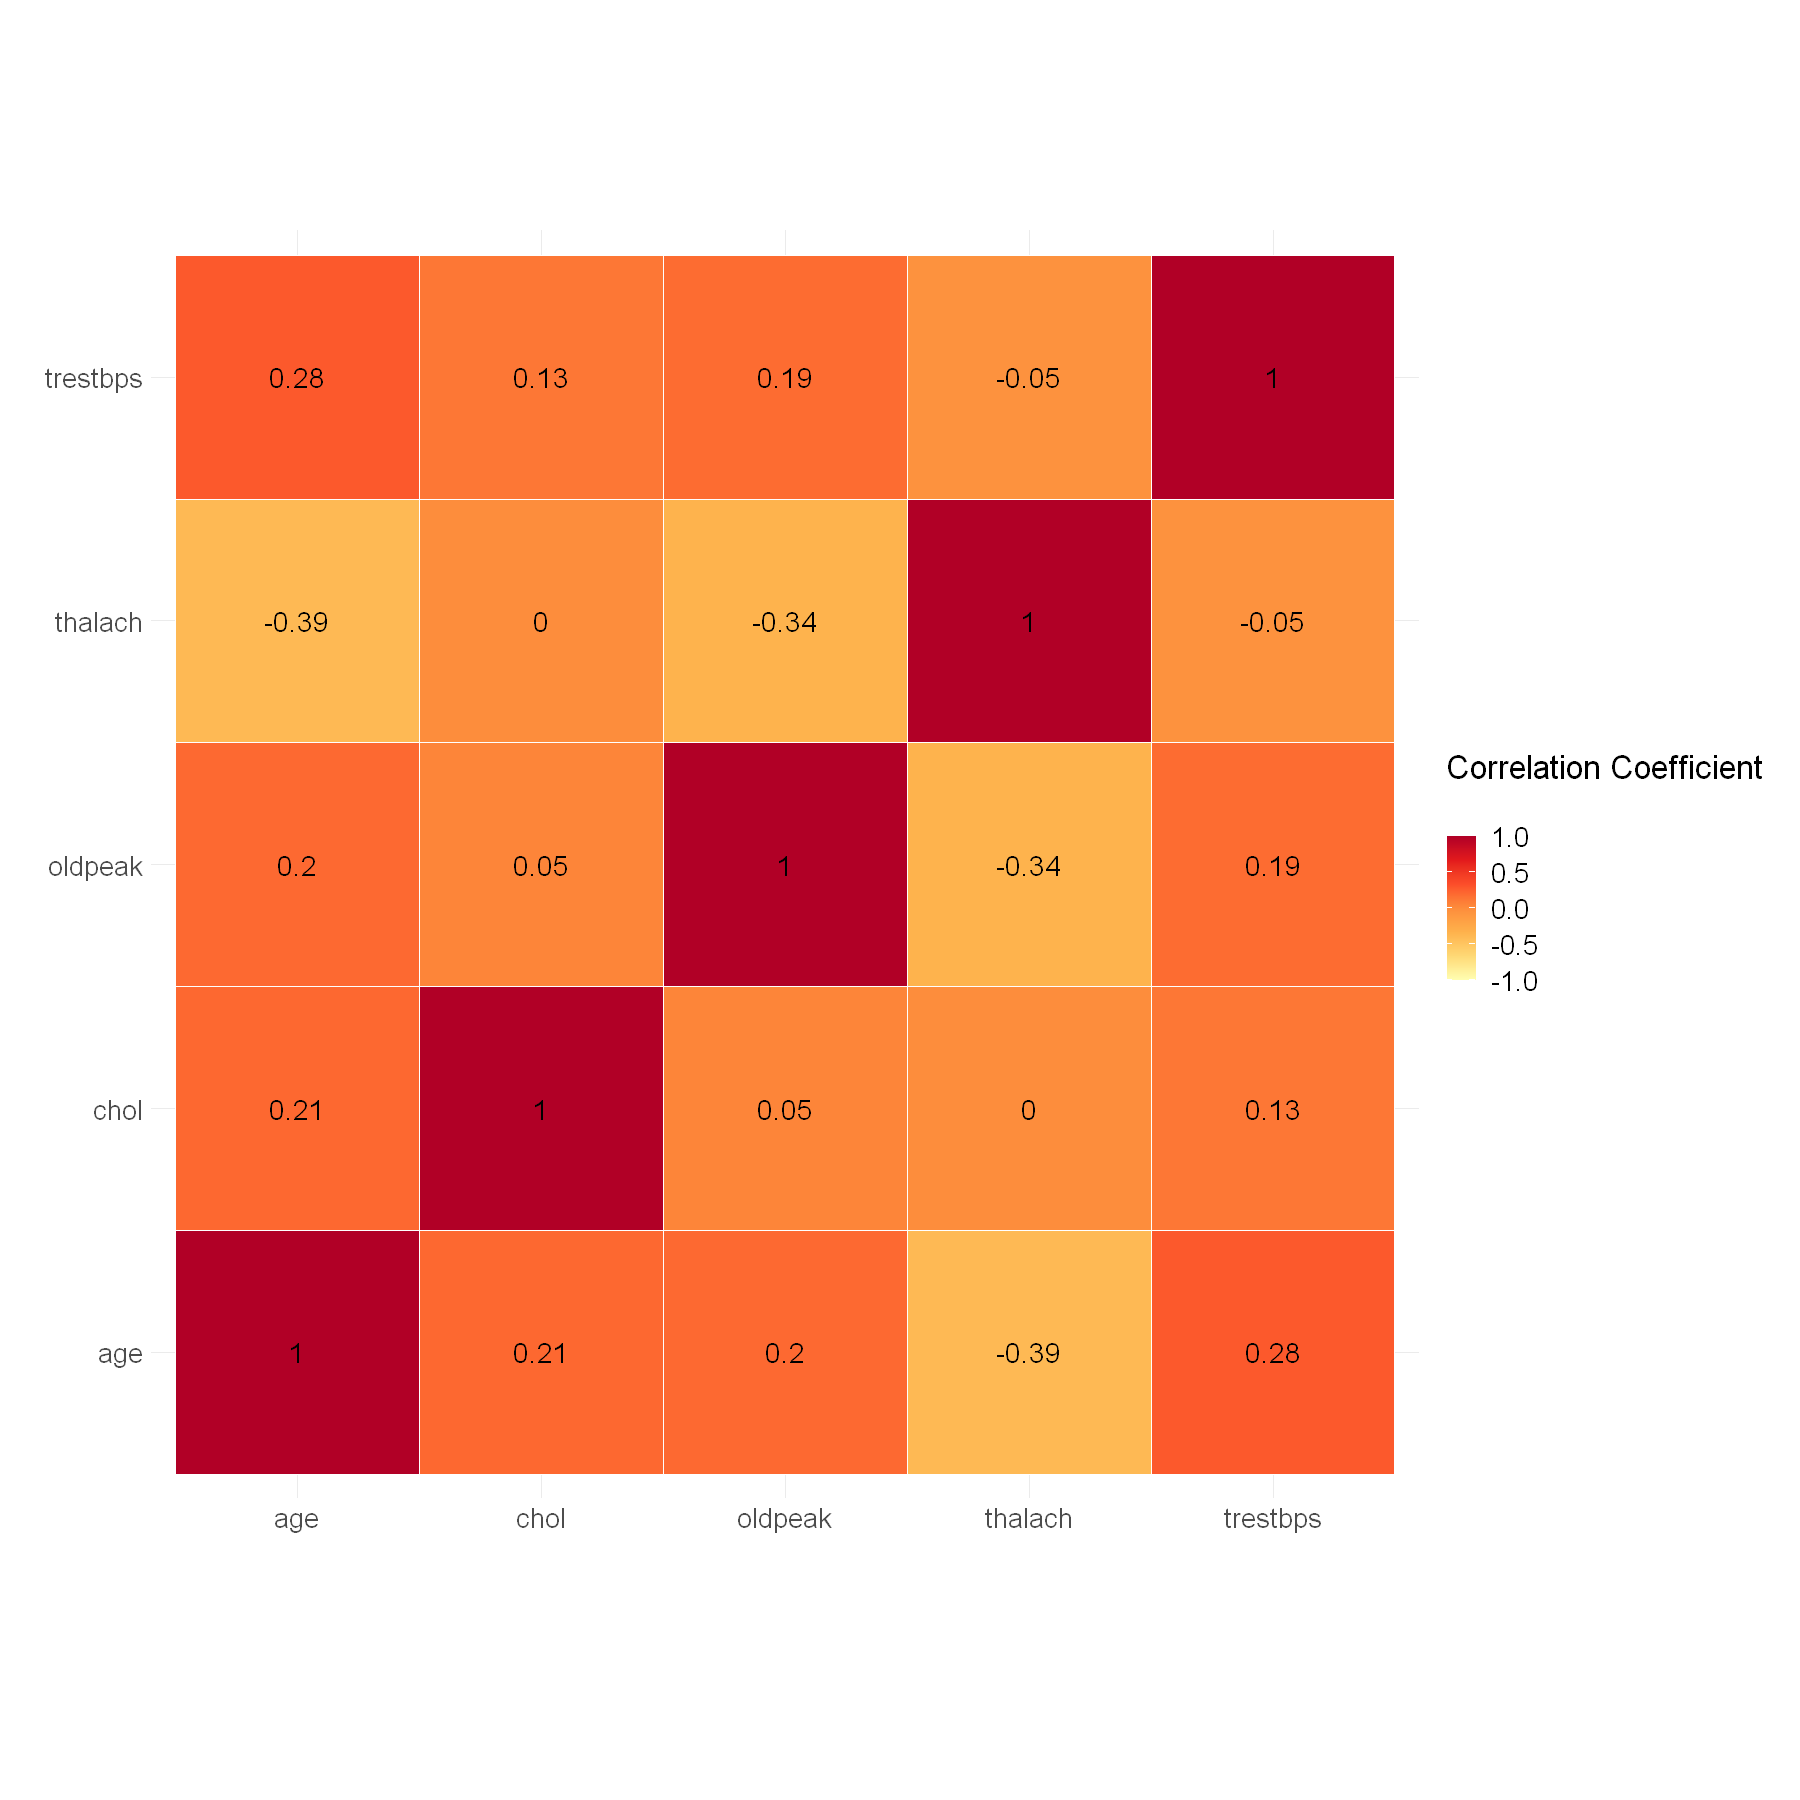

In [32]:
corr_matrix <- heart_data %>%
            select(-categorical_vars, -num) %>%
            cor() %>%
            as_tibble(rownames = 'var1') %>%
            pivot_longer(-var1, names_to = "var2", values_to = "corr")

plot_corr_matrix <- corr_matrix %>%
   ggplot(aes(var1, var2)) +
   geom_tile(aes(fill = corr), color = "white") +
   scale_fill_distiller("Correlation Coefficient \n",
       palette =  "YlOrRd",
       direction = 1, 
       limits = c(-1, 1)
     ) +
     labs(x = "", y = "") +
     theme_minimal() +
     theme(text = element_text(size = 20)) +
     coord_fixed() +
   geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)

plot_corr_matrix

- Boxplots between heart disease diagnosis and numerical variables.

    - By drawing boxplots grouping them by the presence or absence of heart disease, we can easily see the distribution of points, outliers, differences in mean, median and variability amongst variables, which can help us identify which variables are most influential in predicting heart disease.

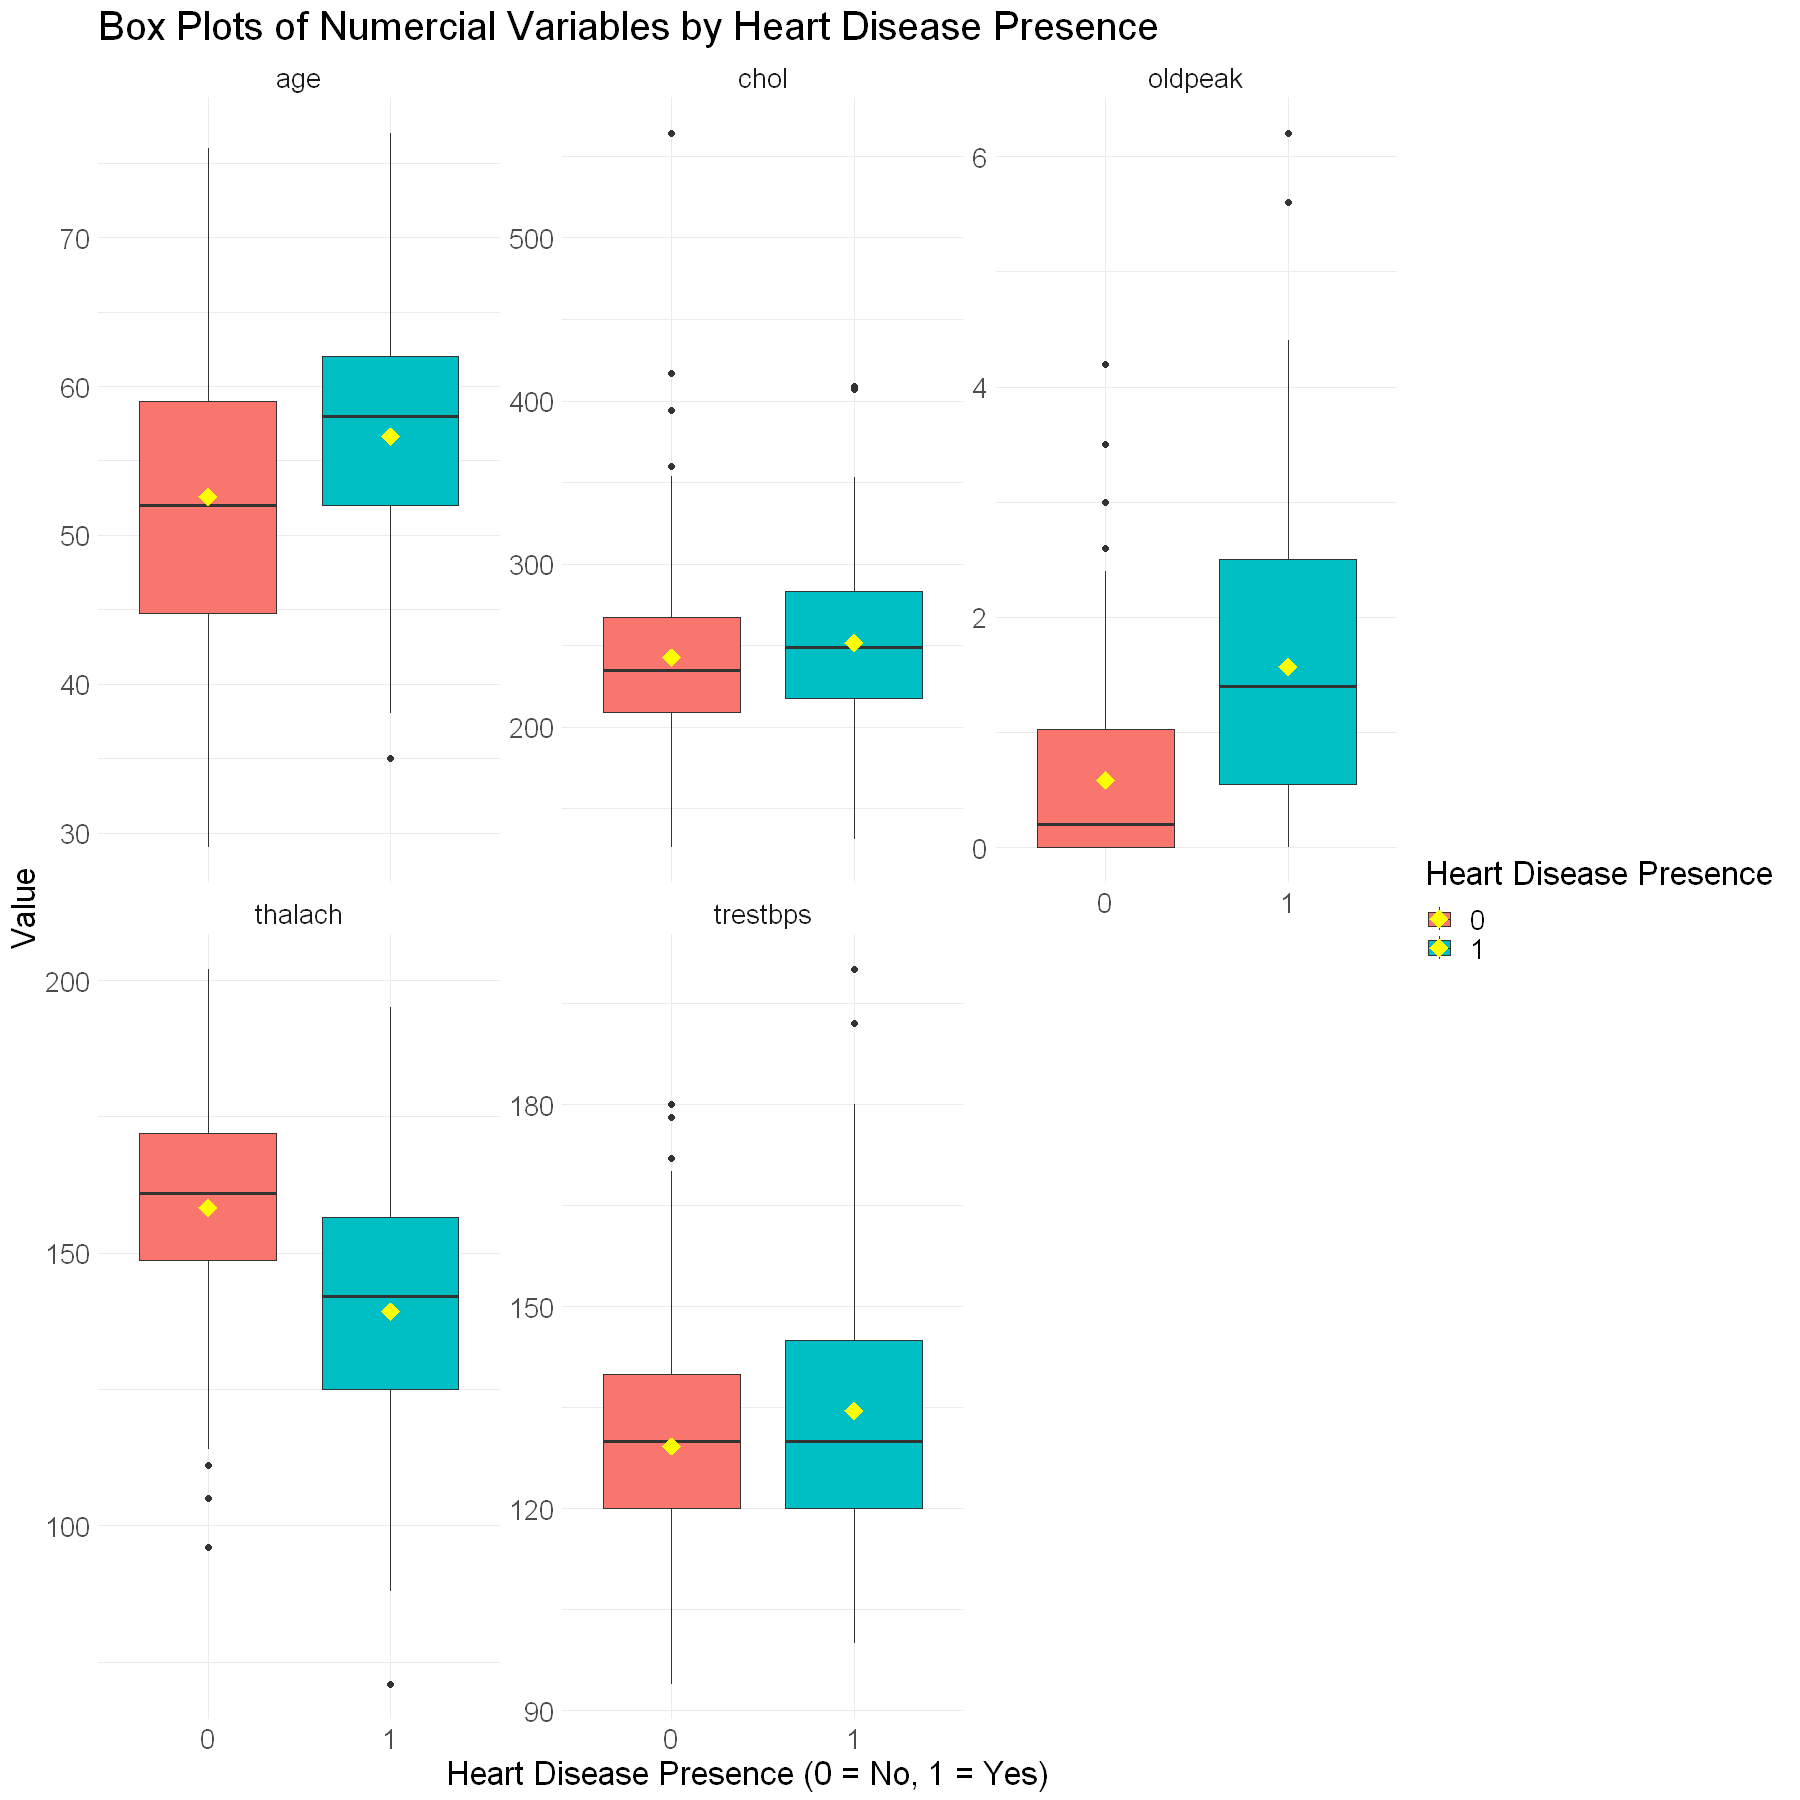

In [ ]:
heart_long <- heart_data %>%
  select(- categorical_vars) %>%
  pivot_longer(cols = -num , names_to = "variable", values_to = "value")

heart_boxplot <- heart_long %>%
    ggplot(aes(x = as.factor(num), y = value, fill = as.factor(num))) +
    geom_boxplot() +
    facet_wrap(~ variable, scales = "free_y") +
    stat_summary(aes(as.factor(num), value, fill = as.factor(num)),
                fun = mean,
                colour = "yellow",
                geom = "point",
                shape = 18,
                size = 5
   ) +
    theme_minimal() +
    theme(text = element_text(size = 20)) +
    labs(title = "Box Plots of Numercial Variables by Heart Disease Presence", x = "Heart Disease Presence (0 = No, 1 = Yes)", y = "Value") +
    scale_fill_discrete(name = "Heart Disease Presence")
heart_boxplot

- Visualize the relationship between the numerical variables in the data by `ggpair`.

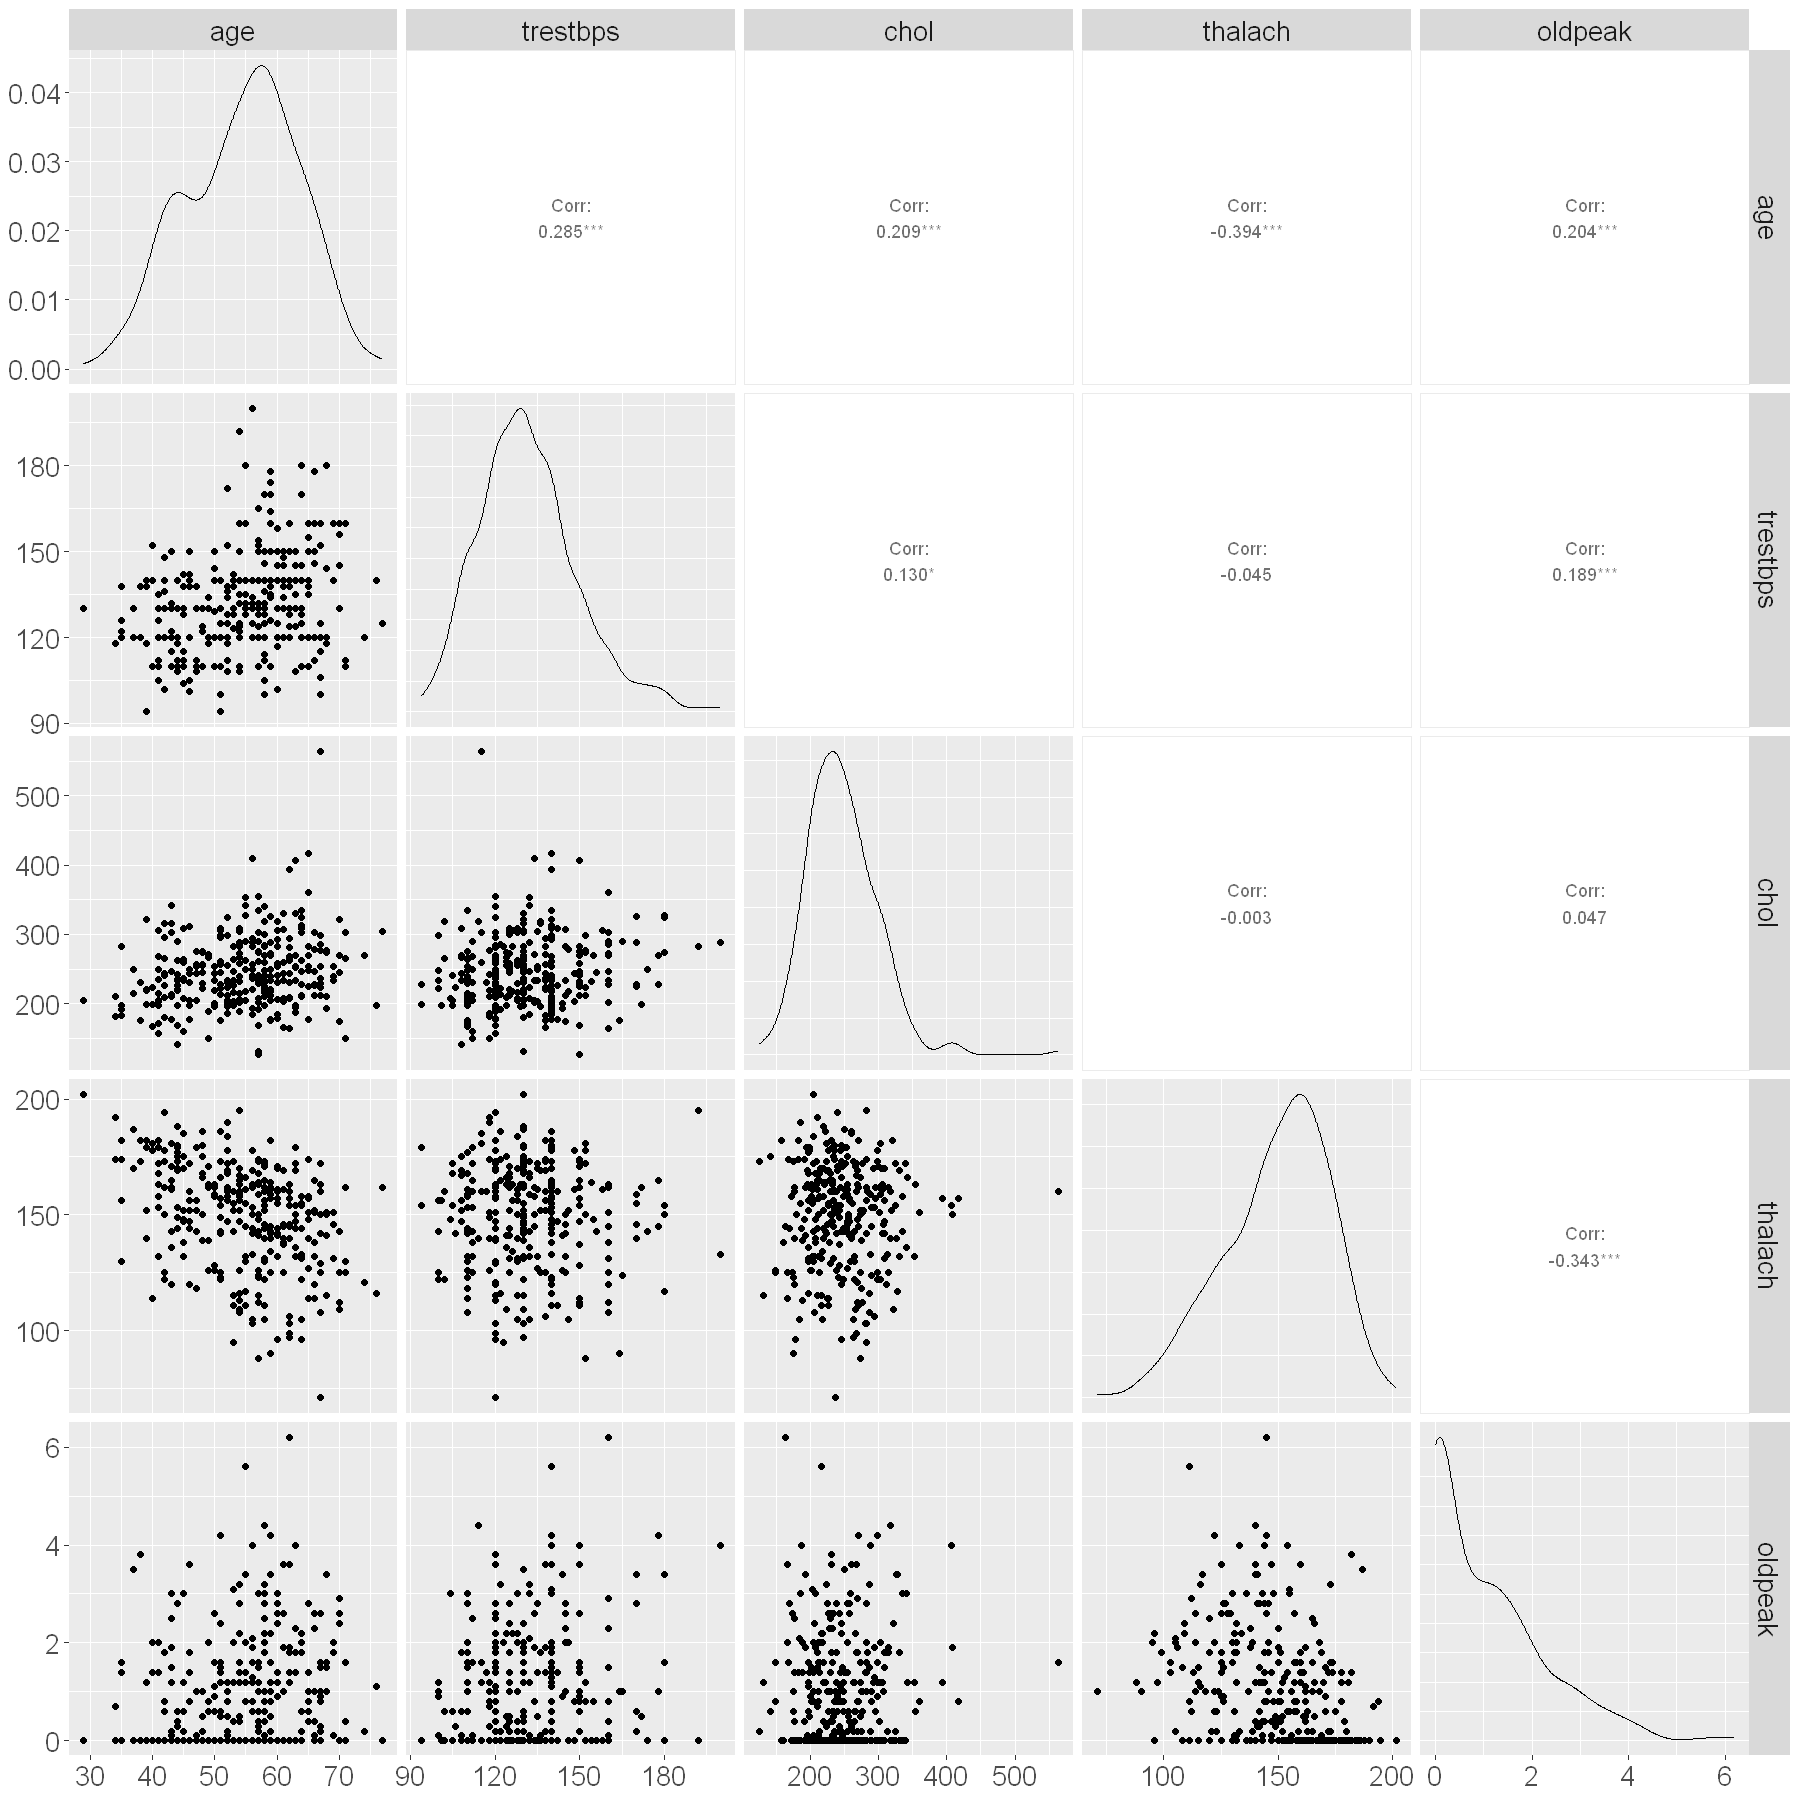

In [ ]:
heart_pair <- 
    heart_data %>%
    select(-num, -categorical_vars) %>%
    ggpairs(progress = FALSE) +
    theme(text = element_text(size = 20))

heart_pair

## IV. Methods and Plan ##

- Since the response variable is a binary one, I attempt to use logistic regression to make a model and predict the probability of  heart disease presence.

- Attempted procedures:
    1. Split data into train & test.
    2. Fit the full Logistic Regression model by train. Then use model to calculate test RMSE.
    3. Make a forward selection. Out of the 13 models, select the best one in terms of its goodness of fit (smallest 𝐶_𝑝).
    4. Fit the reduced Logistic Regression model using train. Then use model to calculate test RMSE.
    5. Compare the test RMSE between full&reduced model, pick the model with smaller RMSE.
    6. Tidy the results of the chosen model, interpret coefficients, p-values, confidence intervals.
    7. Use final chosen model to predict the heart disease probability of a given patient.


- We need to make 4 assumptions:
    1. Linearity of Logits
    2. Independence Identical Distribution of Errors terms (including constant variation)
    3. Normailty of Errors
    4. No collinearity


- The potential weaknesses may include:
    - difficulty of interpretation compared to linear regression.
    - failed to detect cofounders, causing false accuracy.
    - overfitting
    - results influenced by strong outliers
    - Due to assumption of logit being linearary, non linear problems can't be solved with this.
